In [17]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import pydotplus
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

In [65]:
pd.set_option('display.max_rows', None)  # 전체 행 출력
#pd.options.display.max_rows = 60

## 1. 전처리 및 train set, test set 생성

In [3]:
# train set으로 쓰일 시,도별 + 경기도 데이터 셋

sido = pd.read_csv("./final_dataset/지역명_사망자수(train).csv")
sido = sido.drop(columns=['Unnamed: 0'])
sido

,지역명,병원수,격리병상수,남은 격리병상수,총인구,요양기관수,60세 이상 - 계,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,확진자수,사망자수
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,경상남도,35.0,940.0,176.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243
5,대전광역시,10.0,325.0,80.0,1488435.0,47.0,299964,102881,70114,50097,37683,24168,15021,496421.0,612
6,부산광역시,28.0,679.0,188.0,3212282.0,169.0,869020,278378,214341,157522,114719,68256,35804,1026370.0,2002
7,서울특별시,47.0,2150.0,361.0,9231569.0,125.0,2045748,654912,485063,369940,272798,163781,99254,3391551.0,4504
8,세종특별자치시,2.0,32.0,9.0,353933.0,5.0,48720,16969,11421,7769,5719,3938,2904,134571.0,34
9,울산광역시,7.0,229.0,49.0,1135423.0,40.0,218134,84906,55024,34583,22620,13350,7651,366309.0,322


In [24]:
sido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loc         46 non-null     object 
 1   cnt_hos     46 non-null     float64
 2   bed         46 non-null     float64
 3   remain_bed  46 non-null     float64
 4   pop         46 non-null     float64
 5   nurse       46 non-null     float64
 6   total60     46 non-null     int64  
 7   60-64       46 non-null     int64  
 8   65-69       46 non-null     int64  
 9   70-74       46 non-null     int64  
 10  75-79       46 non-null     int64  
 11  80-84       46 non-null     int64  
 12  85-         46 non-null     int64  
 13  conf        46 non-null     float64
 14  death       46 non-null     int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 5.5+ KB


In [4]:
# 칼럼명 변경

columns = ['loc','cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf','death']
var_name = pd.DataFrame(sido.columns, columns, columns=['meaning'])
var_name

,meaning
loc,지역명
cnt_hos,병원수
bed,격리병상수
remain_bed,남은 격리병상수
pop,총인구
nurse,요양기관수
total60,60세 이상 - 계
60-64,60~64세
65-69,65~69세
70-74,70~74세


In [5]:
sido.columns = columns
sido.head()

,loc,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,death
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,경상남도,35.0,940.0,176.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243


### 1-1. outlier 제거 -> 안 하고 정규화로 대체

### 1-2. 변수 간 상관관계 시각화

<AxesSubplot:>

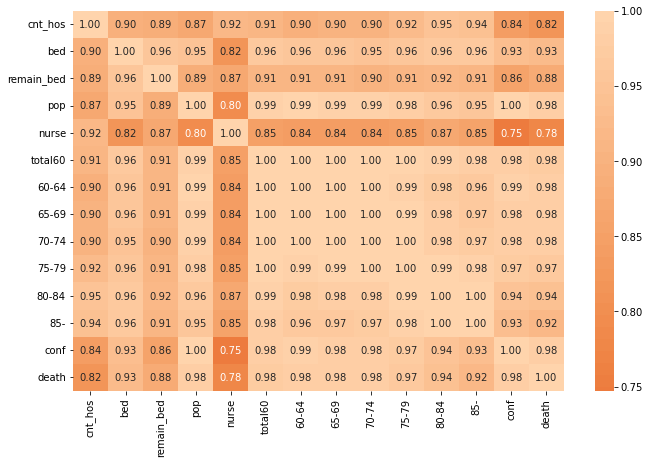

In [6]:
# 상관계수 히트맵

import seaborn as sns
corr = sido.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot=True, fmt=".2f",center=0, ax=ax)

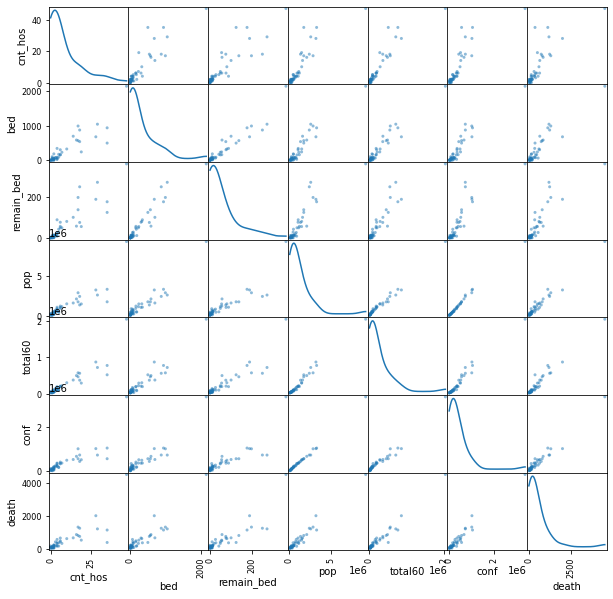

In [9]:
# 산점도 행렬 
# 중요 변수만 고르기 - cnt_hos, bed, remain_bed, pop, total60, conf
from pandas.plotting import scatter_matrix, parallel_coordinates
axes = scatter_matrix(sido[['cnt_hos','bed','remain_bed','pop','total60','conf','death']], alpha = 0.5, figsize = (10,10), diagonal='kde')

In [35]:
# 핑크색 워닝 메시지 없애기 ㅎ

import warnings
warnings.filterwarnings(action='ignore')

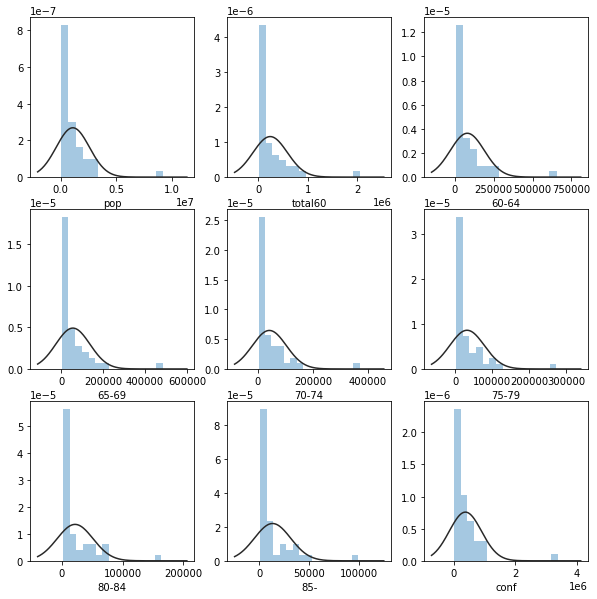

In [36]:
# 인구수 변수의 분포 확인 - 스케일링 전

c1_name = [['pop','total60','60-64'],['65-69','70-74','75-79'],['80-84','85-','conf']]
fig, ax = plt.subplots(nrows = 3,ncols = 3)

for i in range(3): #행
    for j in range(3): #열
        sns.distplot(sido[c1_name[i][j]], kde=False, rug=False, fit =sp.stats.norm, ax = ax[i][j])

fig.set_size_inches(10,10)
plt.show()

### 1-3. 스케일링 - Normalization ( MinMaxScaler 사용 )

인구 수 변수 (pop, total60, 60-64, 65-69, 70-74, 75-79, 80-84, 85-, conf,)에 대해서 Normalization을 진행해보실래요?  
데이터를 0~1 사이로 축소시키는데 원래 데이터의 분포는 손실되지 않는다는 특징이 있습니다.   
그렇게 해서 이상치랑 정규화를 한꺼번에 처리하는게 좋을 것 같네요  

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
# 인구수 변수에 대해 스케일링 시행
pop_col = ['pop','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
scaler = MinMaxScaler()
scaled_pop = pd.DataFrame(scaler.fit_transform(sido[pop_col]), columns = pop_col)
scaled_pop.head()

,pop,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,0.142024,0.174970,0.172863,0.162636,0.147814,0.188088,0.225187,0.232070,0.126486
1,0.354071,0.374228,0.382791,0.366430,0.342466,0.360125,0.422676,0.433477,0.307492
2,0.276504,0.346883,0.321055,0.330982,0.318689,0.362771,0.454657,0.479964,0.212634
3,0.156192,0.135868,0.142294,0.129267,0.134939,0.134464,0.136427,0.132109,0.149573
4,0.257737,0.268467,0.274492,0.270596,0.254246,0.262346,0.282103,0.265634,0.213319


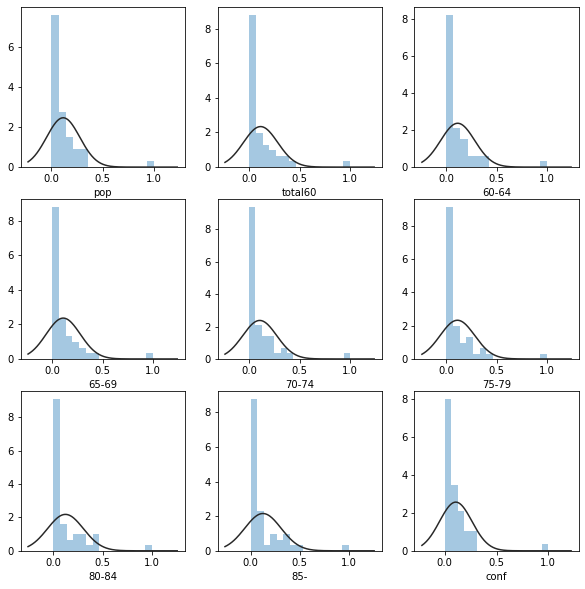

In [37]:
# 인구수 변수의 분포 확인 - 스케일링 후

c1_name = [['pop','total60','60-64'],['65-69','70-74','75-79'],['80-84','85-','conf']]
fig, ax = plt.subplots(nrows = 3,ncols = 3)

for i in range(3): #행
    for j in range(3): #열
        sns.distplot(scaled_pop[c1_name[i][j]], kde=False, rug=False, fit =sp.stats.norm, ax = ax[i][j])

fig.set_size_inches(10,10)
plt.show()

## 스케일링 전과 비교하여, 데이터 값의 범위는 [0,1]로 축소됐지만 분포는 동일한 것을 확인할 수 있다.

In [40]:
# 스케일링 된 인구 수 데이터프레임과 (인구수 변수 제외된)원래 데이터프레임 합치기 => 스케일링까지 전처리 완료된 데이터프레임 완성 😆❤️

sc_sido = pd.concat([sido.drop(columns = pop_col), scaled_pop], axis=1)
sc_sido

,loc,cnt_hos,bed,remain_bed,nurse,death,pop,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,강원도,18.0,539.0,75.0,34.0,746,0.142024,0.174970,0.172863,0.162636,0.147814,0.188088,0.225187,0.232070,0.126486
1,경상남도,35.0,940.0,176.0,129.0,1134,0.354071,0.374228,0.382791,0.366430,0.342466,0.360125,0.422676,0.433477,0.307492
2,경상북도,29.0,1046.0,271.0,111.0,1203,0.276504,0.346883,0.321055,0.330982,0.318689,0.362771,0.454657,0.479964,0.212634
3,광주광역시,19.0,240.0,55.0,60.0,520,0.156192,0.135868,0.142294,0.129267,0.134939,0.134464,0.136427,0.132109,0.149573
4,대구광역시,18.0,876.0,249.0,75.0,1243,0.257737,0.268467,0.274492,0.270596,0.254246,0.262346,0.282103,0.265634,0.213319
5,대전광역시,10.0,325.0,80.0,47.0,612,0.157374,0.140505,0.151849,0.139280,0.129395,0.131038,0.138537,0.142221,0.142898
6,부산광역시,28.0,679.0,188.0,169.0,2002,0.344967,0.420666,0.421486,0.438447,0.421803,0.415756,0.410576,0.353863,0.299789
7,서울특별시,47.0,2150.0,361.0,125.0,4504,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,세종특별자치시,2.0,32.0,9.0,5.0,34,0.033915,0.016810,0.019852,0.017534,0.014179,0.012902,0.013711,0.018829,0.035772
9,울산광역시,7.0,229.0,49.0,40.0,322,0.118959,0.100217,0.124232,0.107979,0.087166,0.075367,0.071786,0.067170,0.104378


### 1-4. 데이터셋 분리

In [54]:
x = sc_sido.drop(columns=['loc','death'])
y = sc_sido['death']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1) # test
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.3, random_state=1) # train, valid

In [ ]:
# 이미 본 데이터셋의 인구수가 모두 스케일링 되어잇는거니까
# train, valid, test 세트에 대해서는 딱히 스케일링 할 필요 없음 (이미 되어있는거임)
# 마지막에 predict 데이터 세트의 인구수에 대해서만 >> transform << 만 해주면 됨!! (fit_transform 노노노)

## 2. 모델 fit, 성능 확인 

### 2-1. 모델 적용

In [43]:
rf = RandomForestRegressor(n_estimators=500, random_state=1) # n_estimators=500
rf.fit(train_x, train_y)

RandomForestRegressor(n_estimators=500, random_state=1)

### 2-2. 변수 중요도 확인 

In [44]:
# variable (feature) importance plot

importances = rf.feature_importances_
# rf.estimators_ : random forest로 구한 나무 모델 500개. 
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)

       Feature  importance
9        75-79    0.032349
8        70-74    0.037282
10       80-84    0.043570
12        conf    0.052223
0      cnt_hos    0.054904
11         85-    0.057783
4          pop    0.058378
3        nurse    0.066224
7        65-69    0.073913
5      total60    0.092337
2   remain_bed    0.096370
6        60-64    0.097068
1          bed    0.237601


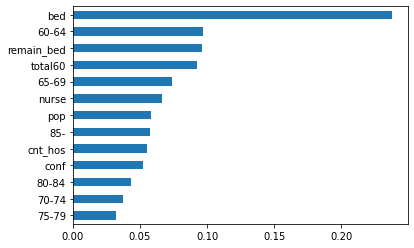

In [45]:
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : 가로막대플롯
ax.set_ylabel('')
plt.show()

### 2-3. 성능 확인

In [46]:
# train set
regressionSummary(train_y, rf.predict(train_x))


Regression statistics

                      Mean Error (ME) : 6.3006
       Root Mean Squared Error (RMSE) : 56.6546
            Mean Absolute Error (MAE) : 39.5079
          Mean Percentage Error (MPE) : -3.5765
Mean Absolute Percentage Error (MAPE) : 12.7511


In [49]:
# valid set
regressionSummary(valid_y, rf.predict(valid_x))


Regression statistics

                      Mean Error (ME) : 418.8866
       Root Mean Squared Error (RMSE) : 1091.5300
            Mean Absolute Error (MAE) : 506.7134
          Mean Percentage Error (MPE) : -58.8954
Mean Absolute Percentage Error (MAPE) : 100.4570


In [50]:
# test set
regressionSummary(test_y, rf.predict(test_x))


Regression statistics

                      Mean Error (ME) : 20.7261
       Root Mean Squared Error (RMSE) : 64.7539
            Mean Absolute Error (MAE) : 50.0350
          Mean Percentage Error (MPE) : -19.9273
Mean Absolute Percentage Error (MAPE) : 50.2694


### 2-4. 예측 오차 시각화

In [51]:
# boxplot
pred_error_train = pd.DataFrame({ 'residual' : train_y - rf.predict(train_x),
                                  'data set' : 'training'})
pred_error_valid = pd.DataFrame({ 'residual' : valid_y - rf.predict(valid_x),
                                  'data set' : 'validation'})
pred_error_test = pd.DataFrame({ 'residual' : test_y - rf.predict(test_x),
                                  'data set' : 'test'})
boxdata_df = pred_error_train.append(pred_error_valid, ignore_index = True)
boxdata_df = boxdata_df.append(pred_error_test, ignore_index = True)
boxdata_df.tail()

,residual,data set
41,9.990,test
42,-77.408,test
43,-42.014,test
44,81.102,test
45,-7.080,test


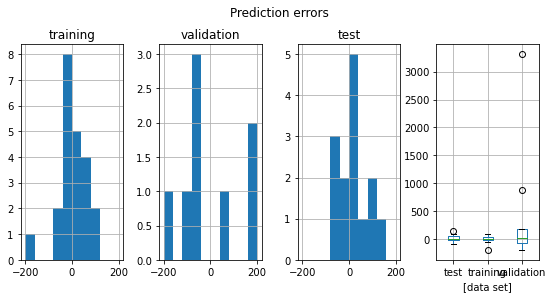

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(9,4)
common = {'bins':10, 'range':[-200, 200]} #
pred_error_train.hist(ax=axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
pred_error_test.hist(ax=axes[2], **common)
boxdata_df.boxplot(ax=axes[3], by='data set')

axes[0].set_title('training')
axes[1].set_title('validation')
axes[2].set_title('test')
axes[3].set_title('')

plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

## validation 성능이 개구렷던건 이상치때매 그랫군... 분포도 제일 큼

### 2-5. 파라미터 조정

In [ ]:
# 가장 중요한 max_features, n_estimators만 조정했습니다.

Storng law of large numbers를 만족 시키기 위해 2000개 이상의 tree 필요  
노드 분할 시 무작위로 선택되는 변수의 수 > Regression = 변수의 수 / 3  
참고 https://youtu.be/lIT5-piVtRw   

In [53]:
# < grid search >
param_grid = {
    'n_estimators' : [1300, 1500, 1700, 2000],
    'max_features' : [2,3,4,5,6,7,8,9,10]
}
gridSearch = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved parameters : ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_
regressionSummary(train_y, regTree.predict(train_x))
regressionSummary(valid_y, regTree.predict(valid_x))

Improved parameters :  {'max_features': 10, 'n_estimators': 1300}

Regression statistics

                      Mean Error (ME) : 5.7737
       Root Mean Squared Error (RMSE) : 59.0673
            Mean Absolute Error (MAE) : 40.4883
          Mean Percentage Error (MPE) : -4.1241
Mean Absolute Percentage Error (MAPE) : 13.0683

Regression statistics

                      Mean Error (ME) : 421.0550
       Root Mean Squared Error (RMSE) : 1094.2283
            Mean Absolute Error (MAE) : 506.8690
          Mean Percentage Error (MPE) : -58.8552
Mean Absolute Percentage Error (MAPE) : 100.2500


       Feature  importance
9        75-79    0.028388
0      cnt_hos    0.048012
12        conf    0.048529
8        70-74    0.050811
3        nurse    0.051904
11         85-    0.053049
10       80-84    0.058569
4          pop    0.061855
7        65-69    0.067222
2   remain_bed    0.086782
5      total60    0.102315
6        60-64    0.138660
1          bed    0.203903


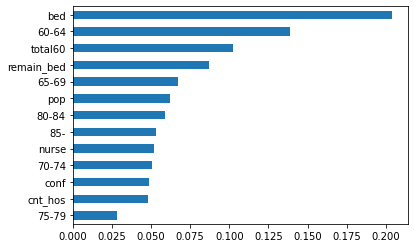

In [55]:
importances = regTree.feature_importances_
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : 가로막대플롯
ax.set_ylabel('')
plt.show()

In [57]:
# 위에서 n_estimators가 가장 작은 1300으로 선택되어서 n_estimators를 작게 조정하여 다시 grid search를 시행
# < grid search >
param_grid = {
    'n_estimators' : [500, 700, 1000,1300],
    'max_features' : [2,3,4,5,6,7,8,9,10]
}
gridSearch = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_x, train_y)
print('Improved parameters : ', gridSearch.best_params_)
regTree_grid = gridSearch.best_estimator_
regressionSummary(train_y, regTree_grid.predict(train_x))
regressionSummary(valid_y, regTree_grid.predict(valid_x))

Improved parameters :  {'max_features': 10, 'n_estimators': 700}

Regression statistics

                      Mean Error (ME) : 4.4234
       Root Mean Squared Error (RMSE) : 58.2403
            Mean Absolute Error (MAE) : 39.7125
          Mean Percentage Error (MPE) : -4.3761
Mean Absolute Percentage Error (MAPE) : 13.3238

Regression statistics

                      Mean Error (ME) : 416.9324
       Root Mean Squared Error (RMSE) : 1088.4322
            Mean Absolute Error (MAE) : 507.2036
          Mean Percentage Error (MPE) : -60.2748
Mean Absolute Percentage Error (MAPE) : 101.7867


       Feature  importance
9        75-79    0.037031
8        70-74    0.046492
10       80-84    0.050369
0      cnt_hos    0.054032
3        nurse    0.057081
11         85-    0.058032
12        conf    0.067098
7        65-69    0.069097
4          pop    0.070634
2   remain_bed    0.087869
6        60-64    0.107455
5      total60    0.117531
1          bed    0.177278


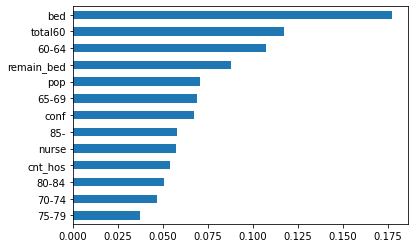

In [59]:
importances = regTree_grid.feature_importances_
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : 가로막대플롯
ax.set_ylabel('')
plt.show()

In [ ]:
# 미세한 차이지만 'max_features': 10, 'n_estimators': 700 모델이 가장 좋아서 이를 채택함 (regTree_grid)

### 2-6. test 세트에 대한 최종 예측 성능

In [58]:
regressionSummary(test_y, regTree_grid.predict(test_x))


Regression statistics

                      Mean Error (ME) : 16.2912
       Root Mean Squared Error (RMSE) : 64.5175
            Mean Absolute Error (MAE) : 48.8631
          Mean Percentage Error (MPE) : -22.7503
Mean Absolute Percentage Error (MAPE) : 50.2983


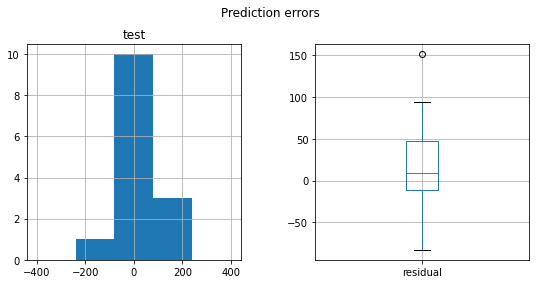

In [60]:
pred_error_test = pd.DataFrame({ 'residual' : test_y - regTree_grid.predict(test_x),
                                  'data set' : 'test'})

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(9,4)
common = {'bins':5, 'range':[-400, 400]} #
pred_error_test.hist(ax=axes[0], **common)
pred_error_test.boxplot(ax=axes[1])

axes[0].set_title('test')
axes[1].set_title('')

plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

## [-100,100]사이의 오차를 가짐. 이상치가 하나 존재한다.

In [120]:
test_death=[]
for i in range(0,45):
    test_death.append(regTree_grid.predict(x.loc[[i]]))
sido_death = sido
sido_death['pred_death'] = pd.DataFrame(test_death)
sido_death[['death','pred_death']]

,death,pred_death
0,746,668.585714
1,1134,1183.727143
2,1203,1172.234286
3,520,603.078571
4,1243,1179.065714
5,612,586.547143
6,2002,1128.025714
7,4504,1193.610000
8,34,97.917143
9,322,509.795714


## 3. 실제 데이터에 predict

### 3-1. 데이터 전처리

In [99]:
pred_sido = pd.read_csv("./final_dataset/시도명_시군구명(predict).csv").drop(columns=['Unnamed: 0'])
pred_sido.head()

,시도명,시군구명,병원수,격리병상수,남은 격리병상수,총인구,요양기관수,60세 이상 - 계,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,확진자수
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0


In [100]:
columns = ['loc_sido','loc_gun','cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
pred_sido.columns = columns
pred_sido

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0
5,강원도,원주시,3.0,131.0,23.0,352429.0,8.0,76620,26789,16898,10822,10081,7434,4596,121739.0
6,강원도,인제군,0.0,0.0,0.0,30147.0,1.0,9039,2900,1960,1246,1338,964,631,11613.0
7,강원도,철원군,1.0,1.0,0.0,43042.0,1.0,13060,3674,2634,2243,2265,1473,771,15572.0
8,강원도,춘천시,2.0,64.0,13.0,284645.0,8.0,68563,21478,14964,10196,10015,7299,4611,102821.0
9,강원도,평창군,1.0,0.0,0.0,39258.0,2.0,15742,4797,3493,2470,2278,1748,956,9659.0


In [101]:
### 남은 병상수에 음수 값을 0으로 변환

pred_sido[pred_sido['remain_bed'] < 0]

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
46,경상남도,남해군,1.0,0.0,-1.0,41587.0,1.0,19264,4227,3698,3378,3078,2731,2152,9062.0
134,서울특별시,중랑구,3.0,208.0,-81.0,385663.0,2.0,97168,32215,23269,17323,12806,7423,4132,130693.0


In [ ]:
#❓❗️❓❗️-1.0까지는 0으로 바꾸겠는데 -81 머.머임...????? +81.0 오타아니야..? 일단 0으로 바꾸고 진행하겠습니다...❓❗️❓❗️

In [102]:
pred_sido.loc[46,'remain_bed'] = 0
pred_sido.loc[134,'remain_bed'] = 0

In [103]:
pred_sido[pred_sido['remain_bed'] < 0] # 음수 없음 확인 

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf


### 3-2. 인구수 변수 스케일링 (transform)

In [106]:
pop_col = ['pop','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
test_scaled_pop = pd.DataFrame(scaler.transform(pred_sido[pop_col]), columns = pop_col)
test_scaled_pop.head()

,pop,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,0.173169,0.267491,0.221449,0.236584,0.267024,0.312479,0.302065,0.311352,0.157017
1,0.066037,0.099850,0.084288,0.091176,0.100564,0.120264,0.102341,0.099037,0.065683
2,0.047844,0.084813,0.064176,0.070458,0.086573,0.106676,0.107402,0.117404,0.039352
3,0.059590,0.088080,0.079010,0.078910,0.085585,0.097249,0.091299,0.090622,0.063183
4,0.023165,0.053977,0.041695,0.047944,0.050409,0.068822,0.071312,0.062222,0.019125


In [109]:
sc_pred_sido = pd.concat([pred_sido.drop(columns = pop_col), test_scaled_pop], axis=1)
sc_pred_sido.head()

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,nurse,pop,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,강원도,강릉시,3.0,79.0,24.0,3.0,0.173169,0.267491,0.221449,0.236584,0.267024,0.312479,0.302065,0.311352,0.157017
1,강원도,동해시,2.0,66.0,1.0,3.0,0.066037,0.099850,0.084288,0.091176,0.100564,0.120264,0.102341,0.099037,0.065683
2,강원도,삼척시,1.0,51.0,8.0,1.0,0.047844,0.084813,0.064176,0.070458,0.086573,0.106676,0.107402,0.117404,0.039352
3,강원도,속초시,2.0,119.0,5.0,2.0,0.059590,0.088080,0.079010,0.078910,0.085585,0.097249,0.091299,0.090622,0.063183
4,강원도,영월군,1.0,27.0,1.0,1.0,0.023165,0.053977,0.041695,0.047944,0.050409,0.068822,0.071312,0.062222,0.019125


### 3-3. Predict

In [113]:
predictors = sc_pred_sido.drop(columns=['loc_sido','loc_gun'])
predictors.head()

,cnt_hos,bed,remain_bed,nurse,pop,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,3.0,79.0,24.0,3.0,0.173169,0.267491,0.221449,0.236584,0.267024,0.312479,0.302065,0.311352,0.157017
1,2.0,66.0,1.0,3.0,0.066037,0.099850,0.084288,0.091176,0.100564,0.120264,0.102341,0.099037,0.065683
2,1.0,51.0,8.0,1.0,0.047844,0.084813,0.064176,0.070458,0.086573,0.106676,0.107402,0.117404,0.039352
3,2.0,119.0,5.0,2.0,0.059590,0.088080,0.079010,0.078910,0.085585,0.097249,0.091299,0.090622,0.063183
4,1.0,27.0,1.0,1.0,0.023165,0.053977,0.041695,0.047944,0.050409,0.068822,0.071312,0.062222,0.019125


In [114]:
pred_death=[]
for i in range(0,206):
    pred_death.append(regTree_grid.predict(predictors.loc[[i]]))

In [125]:
pred_sido_death = pred_sido
pred_sido_death['pred_death'] = pd.DataFrame(pred_death)
pred_sido_death

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,pred_death
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0,617.958571
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0,361.802857
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0,328.467143
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0,323.392857
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0,214.721429
5,강원도,원주시,3.0,131.0,23.0,352429.0,8.0,76620,26789,16898,10822,10081,7434,4596,121739.0,787.418571
6,강원도,인제군,0.0,0.0,0.0,30147.0,1.0,9039,2900,1960,1246,1338,964,631,11613.0,133.492857
7,강원도,철원군,1.0,1.0,0.0,43042.0,1.0,13060,3674,2634,2243,2265,1473,771,15572.0,178.642857
8,강원도,춘천시,2.0,64.0,13.0,284645.0,8.0,68563,21478,14964,10196,10015,7299,4611,102821.0,733.471429
9,강원도,평창군,1.0,0.0,0.0,39258.0,2.0,15742,4797,3493,2470,2278,1748,956,9659.0,219.084286


In [116]:
pred_sido_death.to_csv("./final_dataset/랜덤포레스트_예측결과_최종_피드백반영.csv")

### +) 추가💜
**세분이서 각각 진행한 모델 별로 시군구별로 예측된 사망자수를 도 단위로 합쳐서 원래 데이터의 사망자 수랑 한번 비교해보세요.**

In [133]:
pred_sum = pred_sido_death.groupby('loc_sido', as_index=False).sum()
pred_sum

,loc_sido,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,pred_death
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,4532.135714
1,경기도,70.0,1966.0,467.0,13453658.0,318.0,2517321,878926,572377,412064,314849,207567,131538,4800166.0,19171.345714
2,경상남도,35.0,940.0,177.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,7717.175714
3,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,8439.180000
4,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,3143.214286
5,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,5155.671429
6,대전광역시,10.0,325.0,80.0,1488435.0,47.0,299964,102881,70114,50097,37683,24168,15021,496421.0,3145.061429
7,부산광역시,28.0,679.0,188.0,3212282.0,169.0,869020,278378,214341,157522,114719,68256,35804,1026370.0,8891.904286
8,서울특별시,47.0,2150.0,442.0,9231569.0,125.0,2045748,654912,485063,369940,272798,163781,99254,3391551.0,17480.757143
9,세종특별자치시,2.0,32.0,9.0,353933.0,5.0,48720,16969,11421,7769,5719,3938,2904,134571.0,606.940000


In [166]:
real_death = sido[['loc','death']].iloc[0:16]
real_death

,loc,death
0,강원도,746
1,경상남도,1134
2,경상북도,1203
3,광주광역시,520
4,대구광역시,1243
5,대전광역시,612
6,부산광역시,2002
7,서울특별시,4504
8,세종특별자치시,34
9,울산광역시,322


In [170]:
pred_death = pred_sum[['loc_sido','pred_death']].rename(columns = {'loc_sido':'loc'})
pred_death

,loc,pred_death
0,강원도,4532.135714
1,경기도,19171.345714
2,경상남도,7717.175714
3,경상북도,8439.180000
4,광주광역시,3143.214286
5,대구광역시,5155.671429
6,대전광역시,3145.061429
7,부산광역시,8891.904286
8,서울특별시,17480.757143
9,세종특별자치시,606.940000


In [171]:
# 비교 데이터 프레임 만들기

compare_death = pd.merge(real_death, pred_death)
compare_death

,loc,death,pred_death
0,강원도,746,4532.135714
1,경상남도,1134,7717.175714
2,경상북도,1203,8439.180000
3,광주광역시,520,3143.214286
4,대구광역시,1243,5155.671429
5,대전광역시,612,3145.061429
6,부산광역시,2002,8891.904286
7,서울특별시,4504,17480.757143
8,세종특별자치시,34,606.940000
9,울산광역시,322,2643.124286
